<a href="https://colab.research.google.com/github/AndyAlyf/Klasifikasi-Text/blob/master/classifierProject_PreAlpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import library dan modules yang mo di pake**

In [1]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 2.5MB/s 


In [0]:
import math 
import os
from collections import OrderedDict
import re
import string
import datetime
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
import csv

### **Preprocessing**

In [3]:
cat datasetMiniTrain.csv

"Kementerian BUMN sedang mengkaji pengurangan jumlah perusahaan pelat merah menjadi 100. Saat ini perusahaan pelat merah berjumlah 142. Wakil Menteri Badan Usaha Milik Negara (BUMN) II Kartika Wirjoatmodjo mengatakan, pihaknya akan berkonsultasi dengan Komisi VI DPR RI terlebih dahulu. Pria yang akrab disapa Tiko itu mengatakan, tanggal 20 Februari mendatang pihaknya akan menyambangi Komisi VI DPR RI untuk berdiskusi terkait pengurangan jumlah BUMN.",ekonomi
"(Angkanya) belum pasti. Kita akan coba lihat, itu kan analogi saja, analogi saja, kita coba turunkan lah jumlahnya. Tapi macam-macam (caranya). Mungkin ada yang bisa ditaruh di PPA (PT Perusahaan Pengelola Aset). Kan PPA juga efektif sebagai agen untuk restrukturisasi. Misalnya nanti kita harus gabungkan dan sebagainya, jelas Tiko dalam acara Mandiri Investment Forum di Hotel Fairmont, Jakarta, Rabu (5/2/2020).",ekonomi
"Komisaris Utama Pertamina Basuki Tjahaja Purnama (BTP) alias Ahok lagi-lagi buat gebrakan baru yang menggegerka

In [4]:
dok=[]
kolom=[]
kolom_unik=[]
with open("datasetMiniTrain.csv") as csf:
    readCSV = csv.reader(csf,delimiter=",")
    for i in readCSV:
        dok += [i[0]]
        kolom += [i[1]]
        if i[1] not in kolom_unik:
            kolom_unik += [i[1]]

print(kolom_unik)
print(kolom)
print(dok)

['ekonomi', 'teknologi', 'otomotif', 'sport', 'kuliner']
['ekonomi', 'ekonomi', 'ekonomi', 'teknologi', 'teknologi', 'teknologi', 'otomotif', 'otomotif', 'otomotif', 'sport', 'sport', 'sport', 'kuliner', 'kuliner', 'kuliner']
['Kementerian BUMN sedang mengkaji pengurangan jumlah perusahaan pelat merah menjadi 100. Saat ini perusahaan pelat merah berjumlah 142. Wakil Menteri Badan Usaha Milik Negara (BUMN) II Kartika Wirjoatmodjo mengatakan, pihaknya akan berkonsultasi dengan Komisi VI DPR RI terlebih dahulu. Pria yang akrab disapa Tiko itu mengatakan, tanggal 20 Februari mendatang pihaknya akan menyambangi Komisi VI DPR RI untuk berdiskusi terkait pengurangan jumlah BUMN.', '(Angkanya) belum pasti. Kita akan coba lihat, itu kan analogi saja, analogi saja, kita coba turunkan lah jumlahnya. Tapi macam-macam (caranya). Mungkin ada yang bisa ditaruh di PPA (PT Perusahaan Pengelola Aset). Kan PPA juga efektif sebagai agen untuk restrukturisasi. Misalnya nanti kita harus gabungkan dan sebaga

In [5]:
dok_kolom = []
for i in kolom_unik:
    temp=""
    for j in (range(len(dok))):
        if(kolom[j] == i):
            temp = temp+dok[j]+" "
    dok_kolom += [temp]

print(dok_kolom)

['Kementerian BUMN sedang mengkaji pengurangan jumlah perusahaan pelat merah menjadi 100. Saat ini perusahaan pelat merah berjumlah 142. Wakil Menteri Badan Usaha Milik Negara (BUMN) II Kartika Wirjoatmodjo mengatakan, pihaknya akan berkonsultasi dengan Komisi VI DPR RI terlebih dahulu. Pria yang akrab disapa Tiko itu mengatakan, tanggal 20 Februari mendatang pihaknya akan menyambangi Komisi VI DPR RI untuk berdiskusi terkait pengurangan jumlah BUMN. (Angkanya) belum pasti. Kita akan coba lihat, itu kan analogi saja, analogi saja, kita coba turunkan lah jumlahnya. Tapi macam-macam (caranya). Mungkin ada yang bisa ditaruh di PPA (PT Perusahaan Pengelola Aset). Kan PPA juga efektif sebagai agen untuk restrukturisasi. Misalnya nanti kita harus gabungkan dan sebagainya, jelas Tiko dalam acara Mandiri Investment Forum di Hotel Fairmont, Jakarta, Rabu (5/2/2020). Komisaris Utama Pertamina Basuki Tjahaja Purnama (BTP) alias Ahok lagi-lagi buat gebrakan baru yang menggegerkan publik. Melalui a

### **Pembobotan**

In [6]:
class preprocessing:
    def parsing(dokumen):
        stopword = open("stopword.txt","r").read().split("\n")
        dokumen = dokumen.lower().split()
        dokumen = [kata for kata in dokumen if kata not in stopword]
        return dokumen
    def cleaning(dokumen):
        tandabaca = string.punctuation
        domain = re.compile(r'[\S]+\.(net|com|org)[\S]*\s?')
        dokumenproses = dokumen.strip()
        dokumenproses = domain.sub('',dokumenproses)
        hasil = ''
        for i,karakter in enumerate(dokumenproses):
            if (karakter in tandabaca or karakter.isnumeric()):
                if (i != len(dokumenproses)-1):
                    nextkarakter = dokumenproses[i+1]
                    if (nextkarakter not in tandabaca and not nextkarakter.isnumeric() and nextkarakter != ' '):
                        hasil += ' '
            else:
                hasil += karakter
        return hasil


    def stemming(dokumen):
        return [StemmerFactory().create_stemmer().stem(kata) for kata in dokumen if kata]

    def preprocess(dokumen):
        return preprocessing.stemming(
            preprocessing.parsing(
                preprocessing.cleaning(dokumen)
            )
        )

class weighting:
    def __init__(self):
        self.dokumens = []
        self.fitur = []
        self.bobot_tf = []
    def setdokumen(self,dokumens):
        self.dokumens = dokumens
    def getfitur(self):
        self.fitur = list(OrderedDict((kata,None)for dokumen in self.dokumens for kata in dokumen).keys())
        return self.fitur
    def getbobot_tf(self):
        self.bobot_tf = [[dokumen.count(fitur)for dokumen in self.dokumens] for fitur in self.getfitur()]
        return self.bobot_tf
    def normalisasi(bobot_tf_2d):
        transpose = [[bobot_tf_2d [j][i]for j in range (len(bobot_tf_2d))]for i in range (len(bobot_tf_2d[0]))]
        for i,raw in enumerate (bobot_tf_2d):
            pembagi = math.sqrt(sum(math.pow(element,2)for element in raw))
            bobot_tf_2d[i] = [element/pembagi for element in raw]
        arr = [[bobot_tf_2d[j][i]for j in range (len(bobot_tf_2d))]for i in range (len(bobot_tf_2d[0]))]
        return arr

print("mulai",datetime.datetime.now())        
cls = weighting()
cls.setdokumen([preprocessing.preprocess(x)for x in dok_kolom])
fitur = cls.getfitur()
bobot_tf = cls.getbobot_tf()
bobot_weighted = weighting.normalisasi(bobot_tf)
print(fitur)
print(bobot_tf)
print(bobot_weighted)
print("selesai",datetime.datetime.now())

mulai 2020-02-22 02:46:20.372407
['menteri', 'bumn', 'kaji', 'kurang', 'usaha', 'pelat', 'merah', 'wakil', 'badan', 'milik', 'negara', 'kartika', 'wirjoatmodjo', 'konsultasi', 'komisi', 'dpr', 'ri', 'pria', 'sapa', 'tiko', 'tanggal', 'sambang', 'diskus', 'kait', 'angka', 'coba', 'lihat', 'analogi', 'turun', 'taruh', 'ppa', 'pt', 'kelola', 'aset', 'efektif', 'agen', 'restrukturisasi', 'gabung', 'acara', 'mandiri', 'investment', 'forum', 'hotel', 'fairmont', 'jakarta', 'rabu', 'komisaris', 'utama', 'pertamina', 'basuki', 'tjahaja', 'purnama', 'btp', 'alias', 'ahok', 'gebrak', 'geger', 'publik', 'akun', 'resmi', 'twitternya', 'umum', 'transparansi', 'masyarakat', 'pantau', 'langsung', 'data', 'impor', 'bahan', 'bakar', 'minyak', 'bbm', 'persero', 'laman', 'aplikasi', 'jual', 'game', 'epic', 'games', 'gratis', 'assasins', 'creed', 'syndicate', 'didownload', 'giat', 'program', 'rotasi', 'kutip', 'twitter', 'free', 'faeria', 'diri', 'gerak', 'bidang', 'main', 'online', 'kantor', 'pusat', 'ca

### **Predict and Model**

In [0]:
class naifeBayes():
    def __init__(self,data,kolom,kolom_unik,kolomm):
        self.data=data
        self.kolom=kolom
        self.label_unik = kolom_unik
        self.label = kolomm
        

    def prints(self):
        print(self.data)
        print(self.kolom)
        print(self.label_unik)
        print(self.label)

    def prediksi(self,w):
        words = w
        high = 0
        kats = ""
        for x in range(len(self.label_unik)):
            kata_masuk = 0
            temp = 1
            for i in words:
                if (self.pcd(i,x)>0):
                    kata_masuk+=1
                temp = temp+self.pcd(i,x)
            if (kata_masuk == 0):
                temp = 0
            temp = temp*self.pc(self.label_unik[x])
            # print("Peluang masuk kategori",self.label_unik[x],"adalah : ",temp)
            if (temp > high):
                high = temp
                kats = self.label_unik[x]
        return kats

    def pcd(self,c,x):
        temp = 0
        for i in range(len(self.kolom)):
            if (self.kolom[i] == c and self.data[x][i] > 0.0):
                temp = self.data[x][i]
        return temp

    def pc(self,x):
        leng = len(self.label)
        sumc = 0
        for i in self.label:
            if (x == i):
                sumc+=1
        temp = sumc / leng
        return temp

    def akurasi(self,l1,l2):
        sum=0
        sumj = len(l1)
        for i in range(len(l1)):
            if(l1[i] == l2[i]):
                sum+=1
        temp = sum/sumj
        return temp

In [44]:
artikel = input()
kata_artikel = preprocessing.preprocess(artikel)
kata_artikel = [i for i in kata_artikel if i in fitur]
print(kata_artikel)
nb = naifeBayes(bobot_weighted,fitur,kolom_unik,kolom)
print("--- Artikel masuk pada kategori :",nb.prediksi(kata_artikel),"---")

true_label = []
artikel_t = []
test_label =[]
with open("datasetMiniTrain.csv") as csf:
    readCSV = csv.reader(csf,delimiter=",")
    for i in readCSV:
        true_label+=[i[1]]
        artikel_t +=[i[0]]

for i in artikel_t:
    kats_arti = preprocessing.preprocess(i)
    test_label += [nb.prediksi(kats_arti)]

# print(true_label)
# print(test_label)
print("Akurasi Train: ",nb.akurasi(test_label,true_label))

true_label = []
artikel_t = []
test_label =[]
with open("datasetMiniTest.csv") as csf:
    readCSV = csv.reader(csf,delimiter=",")
    for i in readCSV:
        true_label+=[i[1]]
        artikel_t +=[i[0]]

for i in artikel_t:
    kats_arti = preprocessing.preprocess(i)
    test_label += [nb.prediksi(kats_arti)]

# print(true_label)
# print(test_label)
print("Akurasi Test: ",nb.akurasi(test_label,true_label))

 - Pedagang makanan memang harus cekatan saat mengolah makanan hingga mencuci piring. Video tentang orang India ini membuat orang terkagum-kagum melihatnya. Mengintip video @jarangnontontv, seorang penjual makanan mencuci piringnya yang sangat banyak dengan cara unik. Meskipun dinilai jorok, namun beberapa netizen juga ada yang salut dengan hal ini.Dalam bak berisi air sabun yang berwarna kuning, piring dilemparkan ke wadah lain berisi air bersih. Tapi sepertinya piring ini bukan berbahan keramik, melainkan melamin. Selain mencuci piring, ada juga video yang memperlihatkan orang India mengiris bawang merah. Mengiris bawang merah memang bukan perkara mudah, karena bawang merah memiliki kandungan Sulfoxide yang dapat menghasilkan gas dan membuat mata perih dan berair.Seorang pria dengan mudah mengiris bawang merah dengan bantuan sebilah pisau sangat tajam yang ditaruh dengan posisi berdiri tegak. Dengan menggesekkan bawang merah ke pisau tersebut, hanya dalam hitungan detik, bawang merah

### **Visualisasi dan Presentasi**

In [9]:

present = []
temp_h= ["kata/fitur"]
for i in kolom_unik:
    temp_h += [i]
present+= [temp_h] 

for i in range(len(fitur)):
    temp_h = [fitur[i]]
    for j in range(len(kolom_unik)):
        temp = float(bobot_weighted[j][i])
        jis = f"{temp:.4f}"
        temp_h += [jis]
    present+=[temp_h]

df = pd.DataFrame(present)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                   0        1          2         3       4        5
0         kata/fitur  ekonomi  teknologi  otomotif   sport  kuliner
1            menteri   1.0000     0.0000    0.0000  0.0000   0.0000
2               bumn   1.0000     0.0000    0.0000  0.0000   0.0000
3               kaji   1.0000     0.0000    0.0000  0.0000   0.0000
4             kurang   1.0000     0.0000    0.0000  0.0000   0.0000
5              usaha   0.8944     0.4472    0.0000  0.0000   0.0000
6              pelat   1.0000     0.0000    0.0000  0.0000   0.0000
7              merah   1.0000     0.0000    0.0000  0.0000   0.0000
8              wakil   1.0000     0.0000    0.0000  0.0000   0.0000
9              badan   1.0000     0.0000    0.0000  0.0000   0.0000
10             milik   0.5774     0.5774    0.0000  0.0000   0.5774
11            negara   0.4082     0.0000    0.8165  0.0000   0.4082
12           kartika   1.0000     0.0000    0.0000  0.0000   0.0000
13      wirjoatmodjo   1.0000     0.0000    0.00

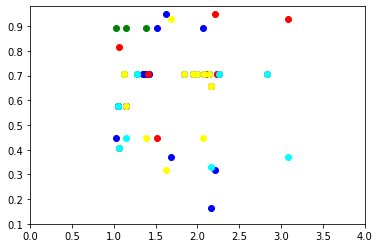

In [29]:
import matplotlib.pyplot as plt
import numpy as np

eko = bobot_weighted[0]
tekn = bobot_weighted[1]
oto = bobot_weighted[2]
spo = bobot_weighted[3]
kul = bobot_weighted[4]

x_l = eko+tekn+oto+spo+kul
x1 = np.logspace(0, 1, len(spo), endpoint=True)
# x1 = range(len(spo))
plt.scatter(x1,eko,c='green')
plt.scatter(x1,tekn,c='blue')
plt.scatter(x1,oto,c='red')
plt.scatter(x1,spo,c='yellow')
plt.scatter(x1,kul,c='cyan')
plt.ylim([0.1,0.98])
plt.xlim([0,4])

plt.show()